## GROUP 28

MEMBERS:

LAKSH JAIN - 23110185

TANISH YELGOE - 23110328

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: A/B Testing using Ad Click Prediction


In [2]:
ad_data = pd.read_csv("ad_click_dataset.csv")
display(ad_data)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [3]:
# Handle missing values in ad position by removing them
ad_data_clean = ad_data.dropna(subset=['ad_position'])
print(ad_data_clean.isnull().sum())

id                     0
full_name              0
age                 3814
gender              3779
device_type         1567
ad_position            0
browsing_history    3773
time_of_day         1592
click                  0
dtype: int64


In [4]:
ad_data_clean

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
5,5942,User5942,NaN,Non-Binary,NaN,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...
9992,5818,User5818,NaN,NaN,Tablet,Top,Social Media,Night,1
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0


In [5]:
# Convert categorical columns to numerical values
ad_data_clean["gender"] = ad_data_clean["gender"].astype('category').cat.codes
ad_data_clean["device_type"] = ad_data_clean["device_type"].astype('category').cat.codes
ad_data_clean["browsing_history"] = ad_data_clean["browsing_history"].astype('category').cat.codes
ad_data_clean["time_of_day"] = ad_data_clean["time_of_day"].astype('category').cat.codes
ad_data_clean["click"] = ad_data_clean["click"].astype(int)

ad_data_clean = ad_data_clean[ad_data_clean['ad_position'].isin(['Top', 'Bottom'])].copy()
ad_data_clean['ad_position'] = ad_data_clean['ad_position'].map({'Top': 0, 'Bottom': 1})

ad_data_clean


C:\Users\1511l\AppData\Local\Temp\ipykernel_17104\3476349672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_data_clean["gender"] = ad_data_clean["gender"].astype('category').cat.codes
C:\Users\1511l\AppData\Local\Temp\ipykernel_17104\3476349672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_data_clean["device_type"] = ad_data_clean["device_type"].astype('category').cat.codes
C:\Users\1511l\AppData\Local\Temp\ipykernel_17104\3476349672.py:4: SettingWithCopyWarning: 
A value is trying to be se

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,-1,0,0,3,0,1
1,3044,User3044,NaN,1,0,0,-1,-1,1
5,5942,User5942,NaN,2,-1,1,4,1,1
6,7808,User7808,26.0,0,0,0,-1,-1,1
8,7993,User7993,NaN,2,1,1,4,-1,1
...,...,...,...,...,...,...,...,...,...
9989,7518,User7518,NaN,-1,0,1,2,1,1
9992,5818,User5818,NaN,-1,2,0,4,3,1
9995,8510,User8510,NaN,-1,1,0,0,-1,0
9996,7843,User7843,NaN,0,0,1,1,-1,0


In [6]:
# Divide into Group A and Group B
group_a = ad_data_clean[ad_data_clean['ad_position'] == 0].copy() # Users with ad_position = 0 (Top)
group_b = ad_data_clean[ad_data_clean['ad_position'] == 1].copy() # Users with ad_position = 1 (Bottom)

In [7]:
print("GROUP A")
print("Number of samples: ", group_a.shape[0])
display(group_a.head())

GROUP A
Number of samples:  2597


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,-1,0,0,3,0,1
1,3044,User3044,NaN,1,0,0,-1,-1,1
6,7808,User7808,26.0,0,0,0,-1,-1,1
15,7529,User7529,NaN,-1,-1,0,1,0,0
18,2124,User2124,NaN,1,0,0,-1,1,1


In [8]:
print("GROUP B")
print("Number of samples: ", group_b.shape[0])
display(group_b.head())

GROUP B
Number of samples:  2817


,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
5,5942,User5942,NaN,2,-1,1,4,1,1
8,7993,User7993,NaN,2,1,1,4,-1,1
9,4509,User4509,NaN,-1,-1,1,0,0,1
10,2595,User2595,NaN,-1,-1,1,-1,2,1
11,7466,User7466,47.0,-1,1,1,-1,0,1


### Performing two-sample z-test

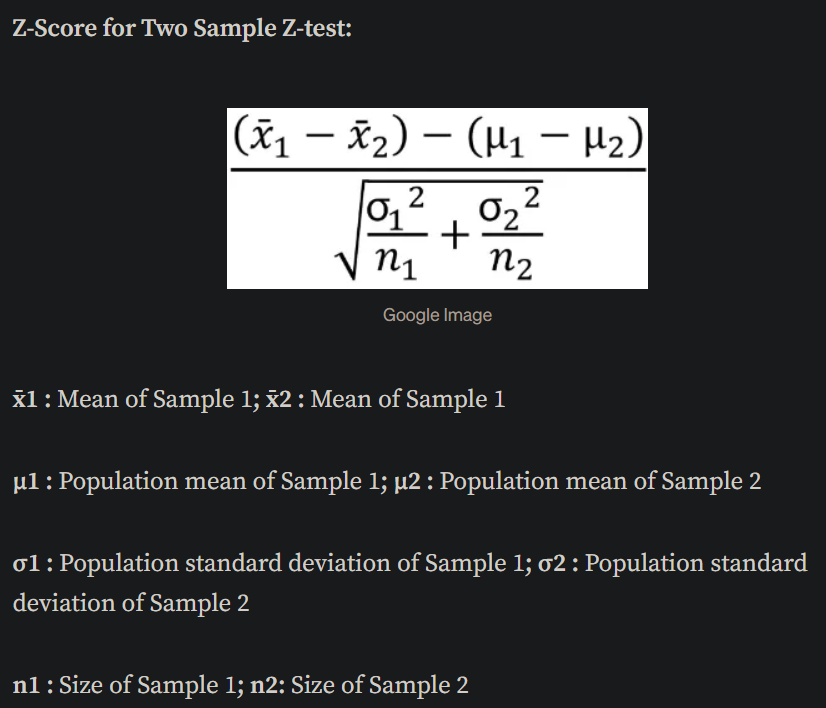

C:\Users\1511l\AppData\Local\Temp\ipykernel_17104\1730820317.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ad Position', y='Click Rate', data=ctr_df, palette='viridis')


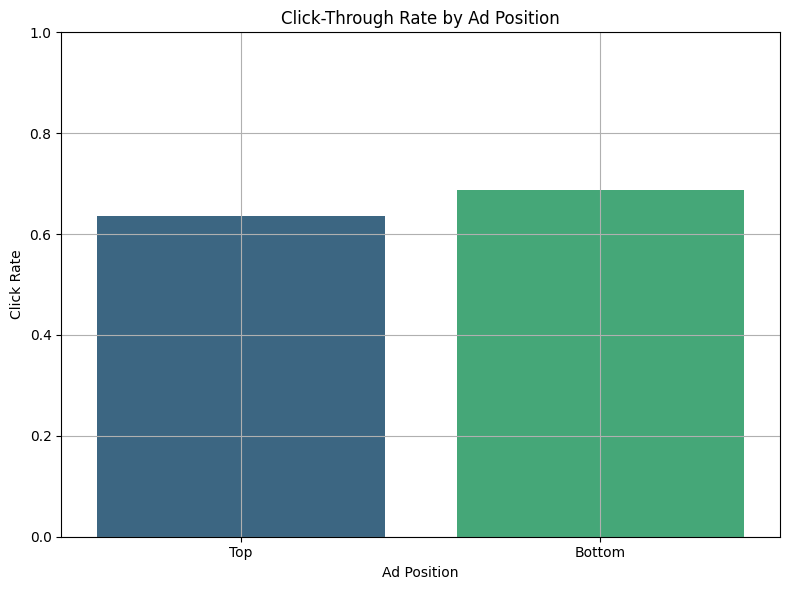

In [9]:
# Calculate CTR for each group
ctr_a = group_a['click'].mean()
ctr_b = group_b['click'].mean()

# Create a DataFrame for plotting
ctr_df = pd.DataFrame({
    'Ad Position': ['Top', 'Bottom'],
    'Click Rate': [ctr_a, ctr_b]
})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Ad Position', y='Click Rate', data=ctr_df, palette='viridis')
plt.title('Click-Through Rate by Ad Position')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
from statsmodels.stats.proportion import proportions_ztest as ztest

clicks = [group_a['click'].sum(), group_b['click'].sum()]
n_samples = [group_a.shape[0], group_b.shape[0]]
z_stat, p_value = ztest(clicks, n_samples)
print(f"Z-score: {z_stat:.4f}\nP-value: {p_value}")

Z-score: -4.0642
P-value: 4.819430188759425e-05


**DEFINITIONS**

- *z-score*: A z-score tells you how many standard deviations away your observed difference is from zero (i.e., no difference between the two groups). For a difference to be considered statistically significant, we usually look for a z-score beyond ±1.96 (for 95% confidence).

- *p-value*: represents the probability that the observed difference in click-through rates happened by random chance, assuming there's no real difference between the groups. To reject the null hypothesis, the value must be less than 0.05.

**INTERPRETATION**:

- Based on the z-test, the z-score is -4.0642 and the p-value is 0.00004. Since the p-value is lesser than the standard significance level of 0.05, we can reject the null hypothesis. This means there is statistically significant difference in click-through rates between users who saw the ad at the top and those who saw it at the bottom. The observed click-through rate of Group A (top ad) is lower than Group B (bottom ad), by about 4 standard deviations. Also the z-score is beyond ±1.96 (>95% confidence)

## Part 2: Covariate Shift Detection Using Air Quality Data


In [4]:
train = pd.read_csv("Air_Quality_Dataset/train.csv")
test1 = pd.read_csv("Air_Quality_Dataset/test1.csv")
test2 = pd.read_csv("Air_Quality_Dataset/test2.csv")

display(train)

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,1849,26/05/2004,19.00.00,-200,1130.0,-200.0,"22,7",1368.0,-200.0,933.0,-200.0,1709.0,1269.0,"26,7","19,5","0,6754",NaN,NaN
1,2533,24/06/2004,07.00.00,"1,2",1030.0,-200.0,"6,9",851.0,102.0,824.0,68.0,1700.0,983.0,"21,9","57,0","1,4742",NaN,NaN
2,3047,15/07/2004,17.00.00,"3,2",1164.0,-200.0,"20,3",1306.0,259.0,648.0,198.0,1886.0,1218.0,"35,5","19,1","1,0888",NaN,NaN
3,805,13/04/2004,07.00.00,"3,9",1496.0,524.0,"19,1",1272.0,328.0,667.0,130.0,2011.0,1399.0,"11,0","64,2","0,8398",NaN,NaN
4,2962,12/07/2004,04.00.00,-200,780.0,-200.0,"1,8",568.0,24.0,1200.0,34.0,1331.0,501.0,"19,9","51,3","1,1803",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3830,17/08/2004,08.00.00,"2,5",1155.0,-200.0,"16,0",1181.0,167.0,580.0,82.0,1850.0,1302.0,"24,3","47,8","1,4321",NaN,NaN
3196,1897,28/05/2004,19.00.00,"1,8",1100.0,-200.0,"11,4",1028.0,112.0,900.0,103.0,1710.0,994.0,"22,1","44,1","1,1573",NaN,NaN
3197,2538,24/06/2004,12.00.00,"1,2",959.0,-200.0,"5,0",763.0,56.0,976.0,58.0,1561.0,549.0,"31,9","30,3","1,4125",NaN,NaN
3198,1146,27/04/2004,12.00.00,"2,4",1179.0,255.0,"14,6",1137.0,132.0,829.0,87.0,1651.0,949.0,"27,2","22,0","0,7785",NaN,NaN


In [5]:
# Data Pre-processing

train = train.drop(['Unnamed: 15','Unnamed: 16'], axis=1)
test1 = test1.drop(['Unnamed: 15','Unnamed: 16'], axis=1)
test2 = test2.drop(['Unnamed: 15','Unnamed: 16'], axis=1)   

train

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1849,26/05/2004,19.00.00,-200,1130.0,-200.0,"22,7",1368.0,-200.0,933.0,-200.0,1709.0,1269.0,"26,7","19,5","0,6754"
1,2533,24/06/2004,07.00.00,"1,2",1030.0,-200.0,"6,9",851.0,102.0,824.0,68.0,1700.0,983.0,"21,9","57,0","1,4742"
2,3047,15/07/2004,17.00.00,"3,2",1164.0,-200.0,"20,3",1306.0,259.0,648.0,198.0,1886.0,1218.0,"35,5","19,1","1,0888"
3,805,13/04/2004,07.00.00,"3,9",1496.0,524.0,"19,1",1272.0,328.0,667.0,130.0,2011.0,1399.0,"11,0","64,2","0,8398"
4,2962,12/07/2004,04.00.00,-200,780.0,-200.0,"1,8",568.0,24.0,1200.0,34.0,1331.0,501.0,"19,9","51,3","1,1803"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3830,17/08/2004,08.00.00,"2,5",1155.0,-200.0,"16,0",1181.0,167.0,580.0,82.0,1850.0,1302.0,"24,3","47,8","1,4321"
3196,1897,28/05/2004,19.00.00,"1,8",1100.0,-200.0,"11,4",1028.0,112.0,900.0,103.0,1710.0,994.0,"22,1","44,1","1,1573"
3197,2538,24/06/2004,12.00.00,"1,2",959.0,-200.0,"5,0",763.0,56.0,976.0,58.0,1561.0,549.0,"31,9","30,3","1,4125"
3198,1146,27/04/2004,12.00.00,"2,4",1179.0,255.0,"14,6",1137.0,132.0,829.0,87.0,1651.0,949.0,"27,2","22,0","0,7785"


### Kolmogorov–Smirnov (KS) test on the NO2(GT) column

In [6]:
from scipy.stats import ks_2samp

# Remove rows with missing values in the 'NO2(GT)' column
train_no2 = train['NO2(GT)'].dropna()
test1_no2 = test1['NO2(GT)'].dropna()
test2_no2 = test2['NO2(GT)'].dropna()

# Remove negative values from the 'NO2(GT)' column
train_no2 = train_no2[train_no2 >= 0]
test1_no2 = test1_no2[test1_no2 >= 0]
test2_no2 = test2_no2[test2_no2 >= 0]

# KS test between train and test1
ks_stat_test1, p_value_test1 = ks_2samp(train_no2, test1_no2)

# KS test between train and test2
ks_stat_test2, p_value_test2 = ks_2samp(train_no2, test2_no2)


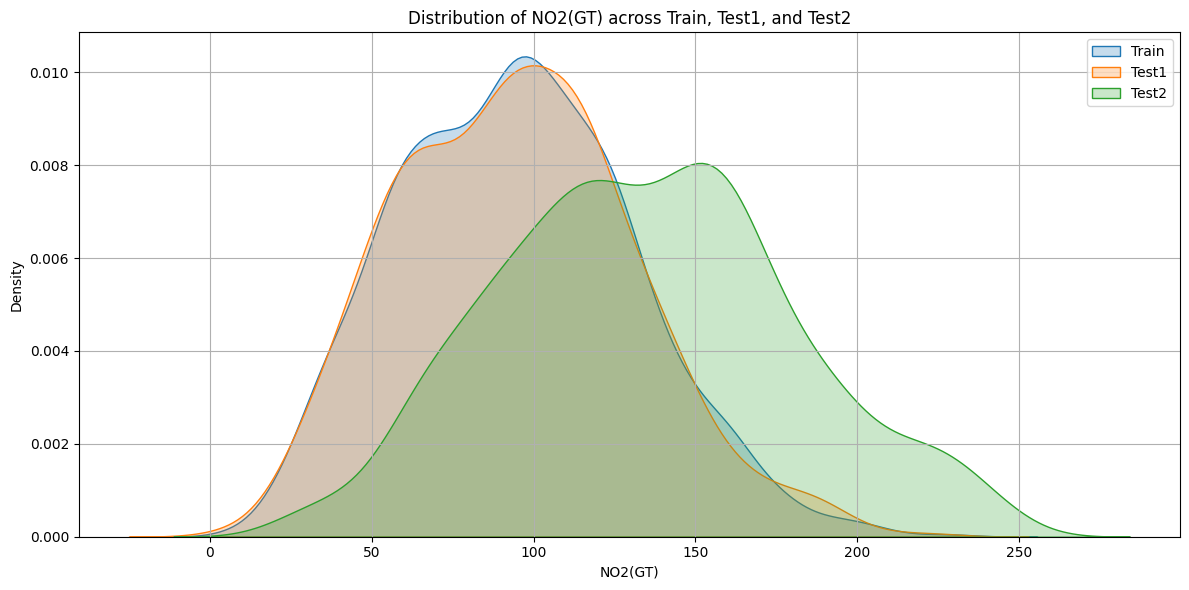

In [7]:
# Plotting the distributions
plt.figure(figsize=(12, 6))

sns.kdeplot(train_no2, label='Train', fill=True)    #  Kernel Density Estimate plot: It’s a smoothed version of 
sns.kdeplot(test1_no2, label='Test1', fill=True)    #  a histogram that shows the probability density function 
sns.kdeplot(test2_no2, label='Test2', fill=True)    # (PDF) of a continuous variable.

plt.title('Distribution of NO2(GT) across Train, Test1, and Test2')
plt.xlabel('NO2(GT)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Results

print("KS Test: Train vs Test1")
print(f"KS Statistic: {ks_stat_test1:.4f}\nP-value: {p_value_test1:.4f}\n")

print("KS Test: Train vs Test2")
print(f"KS Statistic: {ks_stat_test2:.4f}\nP-value: {p_value_test2}")

KS Test: Train vs Test1
KS Statistic: 0.0171
P-value: 0.9971

KS Test: Train vs Test2
KS Statistic: 0.3689
P-value: 2.53172387531317e-74


**DEFINITIONS**

1] KS (Kolmogorov-Smirnov) statistic: Measures the maximum difference between the cumulative distributions of two datasets. The higher the KS score, the greater the difference between the two distributions. A low KS score means the distributions are very similar.

2] P-value: Measures the probability of observing the data, assuming the null hypothesis (that the two distributions are the same) is true. A low p-value (< 0.05) suggests that the null hypothesis can be rejected, meaning the two distributions are likely different. A high p-value (> 0.05) indicates that we fail to reject the null hypothesis, suggesting no significant difference between the distributions.

**INTERPRETATION**

1] Train vs Test1

- The numbers indicate that the distributions of NO2(GT) for the training set and test1 are nearly identical. The very high p-value suggests that we fail to reject the null hypothesis, meaning there is no statistically significant difference between these two distributions.

2] Train vs Test2

- The values show a significant difference between the distributions. The high KS statistic and extremely low p-value lead us to reject the null hypothesis, indicating that the distribution of NO2(GT) in test2 is notably different from that in the training set.

**CONCLUSION**

Test2 exhibits a covariate shift relative to the training dataset, as its distribution for NO2(GT) is statistically significantly different from the training set (p-value = 0.0000). In contrast, Test1 does not exhibit a covariate shift (p-value = 0.9722).
